In [1]:
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ratings = pd.read_csv('ratings_Electronics.csv', 
                      names=['userId', 'productId', 'rating', 'timestamp'])

# Save an original copy of the dataframe
ratings_original = ratings.copy(deep=True)

In [3]:
# Check the head of the dataset
ratings.head()

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,132793040,5,1365811200
1,A2CX7LUOHB2NDG,321732944,5,1341100800
2,A2NWSAGRHCP8N5,439886341,1,1367193600
3,A2WNBOD3WNDNKT,439886341,3,1374451200
4,A1GI0U4ZRJA8WN,439886341,1,1334707200


In [4]:
rating_combination = ['userId', 'productId']
ratings[ratings.duplicated(subset=rating_combination, keep=False)].sort_values(rating_combination).head()

,userId,productId,rating,timestamp


Count of observations in each ratings:


C:\Users\Sarah\AppData\Local\Temp\ipykernel_24276\1475990757.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x=ratings_counts.index, y=ratings_counts.values, palette="muted")


[Text(0, 0.5, 'Total number of ratings')]

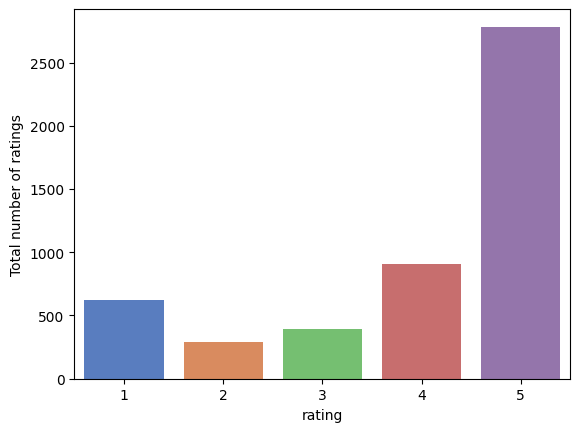

In [5]:
print('Count of observations in each ratings:')
ratings_counts= ratings.rating.value_counts()
g = sns.barplot(x=ratings_counts.index, y=ratings_counts.values, palette="muted")
g.set(ylabel="Total number of ratings")

In [6]:
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process

c:\Users\Sarah\AppData\Local\Programs\Python\Python311\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [7]:
user_item = ratings.pivot(index='userId', columns='productId', values='rating').fillna(0)
print('Shape of User-Item sparse matrix:', user_item.shape)
user_item.head()

Shape of User-Item sparse matrix: (4930, 299)


productId,059400232X,089933623X,094339676X,1034385789,1039869017,1085901386,1094441252,1182702627,1254875778,132793040,...,9574423271,9575871979,970407998,970408005,972683275,977703037,978770382,979526191,983947600,986987662
userId,,,,,,,,,,,,,,,,,,,,,
A00766851QZZUBOVF4JFT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0293130VTX2ZXA70JQS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
A030530627MK66BD8V4LN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
A0590501PZ7HOWJKBGQ4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A076219533YHEV2LJO988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
from scipy.sparse import csr_matrix
mat_users=csr_matrix(user_item.values)
mat_users

<4930x299 sparse matrix of type '<class 'numpy.float64'>'
	with 5001 stored elements in Compressed Sparse Row format>

In [9]:
model_knn= NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)

In [10]:
model_knn.fit(mat_users)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [12]:
df_products = ratings[['productId']]
df_products.head()

,productId
0,132793040
1,321732944
2,439886341
3,439886341
4,439886341


In [23]:
def Recommender(movie_name, data, model, n_recommendations):
    # model.fit(data)
    index = process.extractOne(movie_name, df_products['productId'])[2]
    print('Product Selected: ',df_products['productId'][index], ', Index: ', index)
    print('Searching for recommendations.....')
    print(data)
    distances, indices = model.kneighbors(data[0], n_neighbors=n_recommendations)
    recc_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
    recommend_frame = []
    for val in recc_movie_indices:
        recommend_frame.append({'Product':df_products['productId'][val[0]],'Distance':val[1]})
    df = pd.DataFrame(recommend_frame, index = range(1,n_recommendations))
    return df

In [25]:
n_recommendations = 20
Recommender('132793040', mat_users, model_knn, n_recommendations)

Product Selected:  132793040 , Index:  0
Searching for recommendations.....
  (0, 62)	5.0
  (1, 293)	5.0
  (2, 293)	4.0
  (3, 25)	5.0
  (4, 21)	3.0
  (5, 21)	5.0
  (6, 15)	3.0
  (7, 21)	5.0
  (8, 21)	5.0
  (9, 19)	5.0
  (10, 20)	4.0
  (11, 293)	5.0
  (12, 20)	4.0
  (13, 23)	5.0
  (14, 250)	5.0
  (15, 261)	4.0
  (16, 293)	5.0
  (17, 21)	4.0
  (18, 293)	4.0
  (19, 13)	5.0
  (20, 131)	5.0
  (21, 13)	5.0
  (22, 198)	5.0
  (23, 293)	5.0
  (24, 19)	5.0
  :	:
  (4905, 293)	5.0
  (4906, 78)	5.0
  (4907, 217)	2.0
  (4908, 21)	5.0
  (4909, 200)	5.0
  (4910, 293)	5.0
  (4911, 283)	5.0
  (4912, 293)	5.0
  (4913, 21)	5.0
  (4914, 293)	5.0
  (4915, 21)	5.0
  (4916, 49)	5.0
  (4917, 17)	4.0
  (4918, 152)	5.0
  (4919, 13)	3.0
  (4920, 0)	5.0
  (4921, 88)	4.0
  (4922, 182)	1.0
  (4923, 293)	5.0
  (4924, 88)	1.0
  (4925, 20)	5.0
  (4926, 283)	5.0
  (4927, 104)	5.0
  (4928, 20)	3.0
  (4929, 17)	1.0


,Product,Distance
1,1400698987,1.0
2,1400698987,1.0
3,1400698987,1.0
4,1400698987,1.0
5,1400698987,1.0
6,1400698987,1.0
7,1400698987,1.0
8,1400698987,1.0
9,6123015443,0.0
10,8862935293,0.0
